In [1]:
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import model_from_json
from keras.utils import multi_gpu_model 
from keras.utils import to_categorical


Using TensorFlow backend.


In [2]:
x=pd.read_csv('_xlable4_withNa.txt') 
y=pd.read_csv('_targelable4_withNa.txt') 

print(x.shape)
print(y.shape)
x.head()

(159741, 26)
(159741, 26)


,Unnamed: 0,index,FIELD_1,FIELD_2,COMPARE,AGE,B_DAY,SEX,L100700,L100800,...,L103300,L104600,L190300,L190400,L190500,S000300,S000501,S000502,CLASS,Year
0,0,357038.0,64.0,20130621.0,6.420131e+09,44.0,690507.0,1.0,3.0,77.0,...,3.1,NaN,4.20,12.3,38.2,20.1,121.0,67.0,0.0,2013.0
1,1,357039.0,64.0,20140306.0,6.420140e+09,45.0,690507.0,1.0,3.0,89.0,...,3.3,NaN,4.24,13.1,39.0,19.7,117.0,76.0,0.0,2014.0
2,2,357040.0,64.0,20150904.0,6.420151e+09,46.0,690507.0,1.0,3.8,78.0,...,3.4,5.28,4.26,12.9,38.4,20.2,135.0,82.0,0.0,2015.0
3,3,184391.0,323.0,20130722.0,3.232013e+10,50.0,630314.0,1.0,4.1,98.0,...,3.1,NaN,4.20,13.2,39.9,24.7,112.0,70.0,0.0,2013.0
4,4,184392.0,323.0,20140605.0,3.232014e+10,51.0,630314.0,1.0,3.7,95.0,...,2.8,NaN,4.20,13.5,40.3,24.8,118.0,71.0,0.0,2014.0


In [3]:
df=x.copy()
conditions = [
    (df.S000501 < 120)  ,
    (df.S000501 >= 120) & (df.S000501 < 130),
    (df.S000501 >=130)]
choices = [0,1,2]
df['sbpG'] = np.select(conditions, choices, default=0)
x=df.copy()

conditions2 = [
    (df.S000502 < 80)  ,
    (df.S000502 >= 80) & (df.S000502 < 90),
    (df.S000502 >=90)]
choices2 = [0,1,2]
df['dbpG'] = np.select(conditions2, choices2, default=0)
x=df.copy()

conditions3 = [
    (df.AGE < 30)  ,
    (df.AGE >= 30) & (df.AGE < 40),
    (df.AGE >= 40) & (df.AGE < 50),
    (df.AGE >= 50) & (df.AGE < 60),
    (df.AGE >= 60)]
choices3 = [0,1,2,3,4]
df['AgeG'] = np.select(conditions3, choices3, default=0)
x=df.copy()
x.head()

,Unnamed: 0,index,FIELD_1,FIELD_2,COMPARE,AGE,B_DAY,SEX,L100700,L100800,...,L190400,L190500,S000300,S000501,S000502,CLASS,Year,sbpG,dbpG,AgeG
0,0,357038.0,64.0,20130621.0,6.420131e+09,44.0,690507.0,1.0,3.0,77.0,...,12.3,38.2,20.1,121.0,67.0,0.0,2013.0,1,0,2
1,1,357039.0,64.0,20140306.0,6.420140e+09,45.0,690507.0,1.0,3.0,89.0,...,13.1,39.0,19.7,117.0,76.0,0.0,2014.0,0,0,2
2,2,357040.0,64.0,20150904.0,6.420151e+09,46.0,690507.0,1.0,3.8,78.0,...,12.9,38.4,20.2,135.0,82.0,0.0,2015.0,2,1,2
3,3,184391.0,323.0,20130722.0,3.232013e+10,50.0,630314.0,1.0,4.1,98.0,...,13.2,39.9,24.7,112.0,70.0,0.0,2013.0,0,0,3
4,4,184392.0,323.0,20140605.0,3.232014e+10,51.0,630314.0,1.0,3.7,95.0,...,13.5,40.3,24.8,118.0,71.0,0.0,2014.0,0,0,3


In [4]:
data= pd.merge(x,y, how='inner',left_on=['Unnamed: 0'], right_on=['Unnamed: 0'])
data=data.dropna(). reset_index()

# data=data[data.AGE_x >= 40]
# data=data[data.AGE_x < 50]

# data=data[data.CLASS_x==0]
# data=data[data.sbpG==0]
# data=data[data.dbpG==0]

print(data.shape)

(42628, 55)


In [5]:
print(data.shape)
print(data.columns)
data.head()

(42628, 55)
Index(['index', 'Unnamed: 0', 'index_x', 'FIELD_1_x', 'FIELD_2_x', 'COMPARE_x',
       'AGE_x', 'B_DAY_x', 'SEX_x', 'L100700_x', 'L100800_x', 'L101300_x',
       'L101600_x', 'L101700_x', 'L102900_x', 'L103000_x', 'L103100_x',
       'L103300_x', 'L104600_x', 'L190300_x', 'L190400_x', 'L190500_x',
       'S000300_x', 'S000501_x', 'S000502_x', 'CLASS_x', 'Year_x', 'sbpG',
       'dbpG', 'AgeG', 'index_y', 'FIELD_1_y', 'FIELD_2_y', 'COMPARE_y',
       'AGE_y', 'B_DAY_y', 'SEX_y', 'L100700_y', 'L100800_y', 'L101300_y',
       'L101600_y', 'L101700_y', 'L102900_y', 'L103000_y', 'L103100_y',
       'L103300_y', 'L104600_y', 'L190300_y', 'L190400_y', 'L190500_y',
       'S000300_y', 'S000501_y', 'S000502_y', 'CLASS_y', 'Year_y'],
      dtype='object')


,index,Unnamed: 0,index_x,FIELD_1_x,FIELD_2_x,COMPARE_x,AGE_x,B_DAY_x,SEX_x,L100700_x,...,L103300_y,L104600_y,L190300_y,L190400_y,L190500_y,S000300_y,S000501_y,S000502_y,CLASS_y,Year_y
0,2,2,357040.0,64.0,20150904.0,6.420151e+09,46.0,690507.0,1.0,3.8,...,3.3,4.89,3.82,11.2,34.6,21.0,129.0,78.0,0.0,2016.0
1,5,5,184393.0,323.0,20150917.0,3.232015e+10,52.0,630314.0,1.0,3.4,...,2.6,5.77,4.28,13.5,40.9,25.4,122.0,65.0,0.0,2016.0
2,9,9,415745.0,852.0,20150427.0,8.522015e+10,37.0,781215.0,1.0,3.9,...,3.0,5.91,4.12,12.5,37.8,22.5,105.0,68.0,0.0,2016.0
3,10,10,455748.0,981.0,20160803.0,9.812016e+10,39.0,771005.0,1.0,4.2,...,3.3,4.65,3.97,12.8,38.4,21.4,133.0,85.0,0.0,2017.0
4,15,15,107680.0,2113.0,20150311.0,2.113202e+11,59.0,560817.0,1.0,4.7,...,6.8,5.58,4.44,13.7,39.8,24.1,104.0,67.0,0.0,2016.0


In [10]:
x=data[['AGE_x', 'SEX_x', 'L100700_x','L100800_x', 'L101300_x', 'L101600_x', 'L101700_x', 'L102900_x', 'L103000_x',
       'L103100_x', 'L103300_x', 'L104600_x', 'L190300_x', 'L190400_x', 'L190500_x','S000300_x','S000501_x','S000502_x',
        'CLASS_x','sbpG','dbpG','AgeG']]

y=data[['AGE_y', 'SEX_y', 'L100700_y','L100800_y', 'L101300_y', 'L101600_y', 'L101700_y', 'L102900_y', 'L103000_y',
       'L103100_y', 'L103300_y', 'L104600_y', 'L190300_y', 'L190400_y', 'L190500_y','S000300_y','S000501_y','S000502_y',
        'CLASS_y']]

In [11]:
# temppd=pd.DataFrame(x.copy())
# temppd['y']=y[['S000501_y']]  
# temppd.head()
# corval=abs(temppd.corr()).sort_values(by='y')

In [12]:
# corval.y
# # temppd.corr()


1.L1030
=======

In [14]:
y=data[['AGE_y', 'SEX_y', 'L100700_y','L100800_y', 'L101300_y', 'L101600_y', 'L101700_y', 'L102900_y', 'L103000_y',
       'L103100_y', 'L103300_y', 'L104600_y',  'L190300_y', 'L190400_y', 'L190500_y','S000300_y','S000501_y','S000502_y',
        'CLASS_y']]

ylable=y[['L103000_y']]  
xtrain,xtest,ytrain,ytest=train_test_split(x, ylable, random_state=42, test_size=0.2)


In [15]:
regr = RandomForestRegressor(max_depth=12, random_state=0,verbose =1,
                             n_estimators=300)
regr.fit(xtrain, ytrain) 
print(regr.feature_importances_)
ypred=regr.predict(xtest)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   43.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0.01633818 0.00089145 0.02480888 0.02378652 0.01789983 0.01654454
 0.03982016 0.01986544 0.65845065 0.01768839 0.03418008 0.02614842
 0.01857623 0.01380855 0.01545266 0.02226725 0.01319564 0.01261192
 0.00191392 0.00175591 0.0015229  0.00247247]


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


In [16]:
import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

mean_squared_error 3682.3506583688277
root mean_squared_error 60.68237518727186
mean_absolute_error 37.53897021835052
r2_score 0.5381457835189293


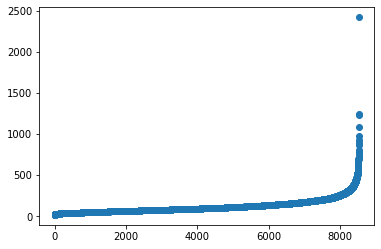

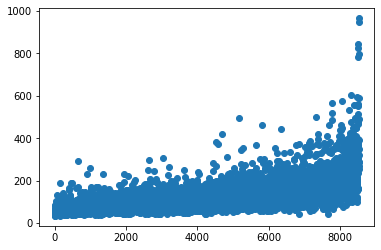

In [17]:
ypredPD=pd.DataFrame()
ypredPD['t']=xtest['L103000_x'].values
ypredPD['t + 1']=ytest.values
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]])
plt.show()
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])

In [18]:
ypredPD['diff']=abs(ypredPD['t + 1']- ypredPD['pred (t +1)'])
print(np.mean(ypredPD['diff']))
print(np.std(ypredPD['diff']))
print(100*ypredPD[ypredPD['diff']<=5].shape[0]/ypredPD.shape[0])

37.538970218350435
47.67783943631063
10.86089608257096


2.S000300
===========

In [20]:
y=data[['AGE_y', 'SEX_y', 'L100700_y','L100800_y', 'L101300_y', 'L101600_y', 'L101700_y', 'L102900_y', 'L103000_y',
       'L103100_y', 'L103300_y', 'L104600_y',  'L190300_y', 'L190400_y', 'L190500_y','S000300_y','S000501_y','S000502_y',
        'CLASS_y']]

ylable=y[['S000300_y']]  
xtrain,xtest,ytrain,ytest=train_test_split(x, ylable, random_state=42, test_size=0.2)

In [21]:
regr = RandomForestRegressor(max_depth=12, random_state=0,verbose =1,
                             n_estimators=300)
regr.fit(xtrain, ytrain) 
print(regr.feature_importances_)
ypred=regr.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
ypredPD['t']=xtest['S000300_x'].values
ypredPD['t + 1']=ytest.values
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   44.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[2.19685145e-03 1.40369711e-04 2.62192840e-03 2.95619262e-03
 1.86454037e-03 2.76432282e-02 4.73311137e-03 2.23349427e-03
 2.99557977e-03 1.93834480e-03 1.64420743e-03 1.93540853e-03
 8.14685957e-03 1.66698992e-03 5.09614475e-03 9.27380694e-01
 2.02506144e-03 2.21162427e-03 8.41190730e-05 1.17291025e-04
 8.56874489e-05 2.82271403e-04]
mean_squared_error 1.1795254932105201
root mean_squared_error 1.0860596177054556
mean_absolute_error 0.6798682331634514
r2_score 0.8805151133981717


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


,t,t + 1,pred (t +1)
0,18.9,19.7,19.040682
1,22.6,22.9,22.744606
2,22.5,22.4,22.613588
3,23.1,23.4,23.106778
4,18.9,19.3,19.244620
5,24.7,25.6,24.766476
6,20.4,20.4,20.483133
7,27.0,26.6,26.852264
8,21.8,21.4,21.912848
9,26.3,26.7,26.213267


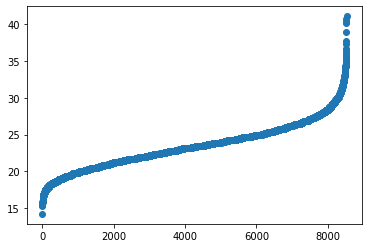

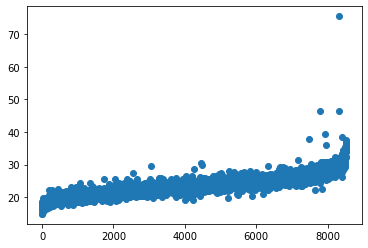

In [22]:
ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]])
plt.show()
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])

In [23]:
ypredPD['diff']=abs(ypredPD['t + 1']- ypredPD['pred (t +1)'])
print(np.mean(ypredPD['diff']))
print(np.std(ypredPD['diff']))
print(100*ypredPD[ypredPD['diff']<= np.mean(ypredPD['diff']) ].shape[0]/ypredPD.shape[0])

0.6798682331634514
0.8469384149663594
62.23316912972086


3. S000501
==============

In [55]:
y=data[['AGE_y', 'SEX_y', 'L100700_y','L100800_y', 'L101300_y', 'L101600_y', 'L101700_y', 'L102900_y', 'L103000_y',
       'L103100_y', 'L103300_y', 'L104600_y',  'L190300_y', 'L190400_y', 'L190500_y','S000300_y','S000501_y','S000502_y',
        'CLASS_y']]

ylable=y[['S000501_y']]  
xtrain,xtest,ytrain,ytest=train_test_split(x, ylable, random_state=42, test_size=0.2)

In [56]:
regr = RandomForestRegressor(max_depth=12, random_state=0,verbose =1,
                             n_estimators=300)
regr.fit(xtrain, ytrain) 
print(regr.feature_importances_)
ypred=regr.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   53.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0.02034178 0.02059913 0.01835401 0.01715264 0.01411087 0.01695649
 0.01877655 0.01779434 0.01936688 0.01470858 0.01280644 0.0173065
 0.01970023 0.01392788 0.01545847 0.04937791 0.61383907 0.02790686
 0.00072696 0.04567617 0.00340373 0.0017085 ]
mean_squared_error 83.95670168763701
root mean_squared_error 9.162788968847694
mean_absolute_error 7.242630051276405
r2_score 0.47953049018542016


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


,t,t + 1,pred (t +1)
0,117.0,104.0,114.843134
1,106.0,110.0,107.269848
2,139.0,130.0,133.080301
3,120.0,150.0,119.073245
4,117.0,117.0,112.829635
5,138.0,135.0,129.383163
6,106.0,110.0,108.556301
7,129.0,116.0,126.927656
8,92.0,92.0,100.585283
9,121.0,139.0,119.579562


In [57]:
ypredPD['diff']=abs(ypredPD['t + 1']- ypredPD['pred (t +1)'])
print(np.mean(ypredPD['diff']))
print(np.std(ypredPD['diff']))
print(100*ypredPD[ypredPD['diff']<=5].shape[0]/ypredPD.shape[0])

7.242630051276419
5.612576202421215
41.84846352334037


4. S000502_x
============

In [27]:
y=data[['AGE_y', 'SEX_y', 'L100700_y','L100800_y', 'L101300_y', 'L101600_y', 'L101700_y', 'L102900_y', 'L103000_y',
       'L103100_y', 'L103300_y', 'L104600_y',  'L190300_y', 'L190400_y', 'L190500_y','S000300_y','S000501_y','S000502_y',
        'CLASS_y']]

ylable=y[['S000502_y']]  
xtrain,xtest,ytrain,ytest=train_test_split(x, ylable, random_state=42, test_size=0.2)

In [28]:
regr = RandomForestRegressor(max_depth=12, random_state=0,verbose =1,
                             n_estimators=300)
regr.fit(xtrain, ytrain) 
print(regr.feature_importances_)
ypred=regr.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
ypredPD['t']=xtest['S000502_x'].values
ypredPD['t + 1']=ytest.values
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   43.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0.0249992  0.00886774 0.02342203 0.02175218 0.01864999 0.02127159
 0.03434034 0.02255906 0.02547828 0.01779113 0.01628268 0.02196817
 0.0250467  0.01971387 0.01918133 0.03681165 0.24457133 0.25617495
 0.00081113 0.09933637 0.03884369 0.00212658]
mean_squared_error 50.64294638109967
root mean_squared_error 7.116385766742812
mean_absolute_error 5.708474616474777
r2_score 0.40652848069547076


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


,t,t + 1,pred (t +1)
0,85.0,73.0,74.647288
1,64.0,60.0,68.040893
2,84.0,86.0,80.807575
3,70.0,85.0,75.610642
4,71.0,78.0,70.522151
5,82.0,73.0,80.890992
6,61.0,68.0,65.943317
7,78.0,79.0,79.165576
8,60.0,64.0,63.725748
9,76.0,87.0,72.434074


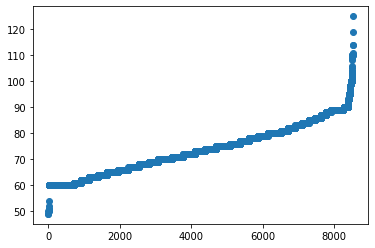

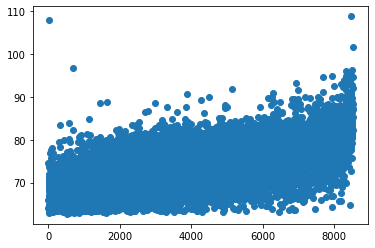

In [29]:
ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]])
plt.show()
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])

In [30]:
ypredPD['diff']=abs(ypredPD['t + 1']- ypredPD['pred (t +1)'])
print(np.mean(ypredPD['diff']))
print(np.std(ypredPD['diff']))
print(100*ypredPD[ypredPD['diff']<=5].shape[0]/ypredPD.shape[0])

5.708474616474777
4.249266281861237
50.703729767769175


5. L101700
===============

In [31]:
y=data[['AGE_y', 'SEX_y', 'L100700_y','L100800_y', 'L101300_y', 'L101600_y', 'L101700_y', 'L102900_y', 'L103000_y',
       'L103100_y', 'L103300_y', 'L104600_y',  'L190300_y', 'L190400_y', 'L190500_y','S000300_y','S000501_y','S000502_y',
        'CLASS_y']]

ylable=y[['L101700_y']]  
xtrain,xtest,ytrain,ytest=train_test_split(x, ylable, random_state=42, test_size=0.2)

In [32]:
regr = RandomForestRegressor(max_depth=12, random_state=0,verbose =1,
                             n_estimators=300)
regr.fit(xtrain, ytrain) 
print(regr.feature_importances_)
ypred=regr.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
ypredPD['t']=xtest['L101700_x'].values
ypredPD['t + 1']=ytest.values
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   52.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[1.01256579e-02 1.54379595e-03 1.63642740e-02 8.80430214e-03
 1.76496002e-02 2.97324228e-02 7.99561778e-01 1.07516197e-02
 1.15624840e-02 1.03744493e-02 8.34392870e-03 1.01713040e-02
 1.37638895e-02 1.09749066e-02 9.74697332e-03 1.07456940e-02
 7.91687063e-03 7.42754651e-03 9.98444221e-04 1.27923891e-03
 7.32798134e-04 1.42802194e-03]
mean_squared_error 500.68789899035636
root mean_squared_error 22.376056377082097
mean_absolute_error 8.735462192992756
r2_score 0.6483089001420852


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


,t,t + 1,pred (t +1)
0,19.0,20.0,18.332893
1,12.0,12.0,12.854557
2,11.0,15.0,11.790005
3,44.0,46.0,46.375418
4,10.0,11.0,10.959478
5,28.0,27.0,30.975372
6,31.0,18.0,37.441043
7,83.0,65.0,68.903819
8,11.0,11.0,11.519186
9,12.0,17.0,13.070013


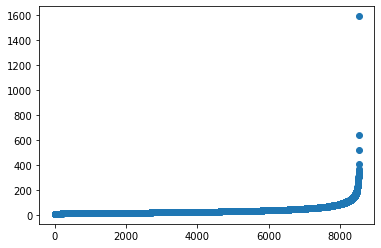

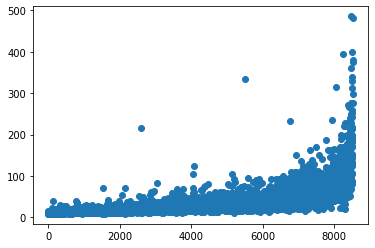

In [33]:
ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]])
plt.show()
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])

6. L103300
==============

In [34]:
y=data[['AGE_y', 'SEX_y', 'L100700_y','L100800_y', 'L101300_y', 'L101600_y', 'L101700_y', 'L102900_y', 'L103000_y',
       'L103100_y', 'L103300_y', 'L104600_y',  'L190300_y', 'L190400_y', 'L190500_y','S000300_y','S000501_y','S000502_y',
        'CLASS_y']]

ylable=y[['L103300_y']]  
xtrain,xtest,ytrain,ytest=train_test_split(x, ylable, random_state=42, test_size=0.2)

In [35]:
regr = RandomForestRegressor(max_depth=12, random_state=0,verbose =1,
                             n_estimators=300)
regr.fit(xtrain, ytrain) 
print(regr.feature_importances_)
ypred=regr.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
ypredPD['t']=xtest['L103300_x'].values
ypredPD['t + 1']=ytest.values
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   54.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[7.56881519e-03 1.12902141e-03 9.72725807e-03 7.97303905e-03
 6.89681681e-03 9.57405958e-03 1.02375750e-02 8.29046132e-03
 1.56101063e-02 5.60626340e-03 8.60796072e-01 1.11271163e-02
 8.93659442e-03 5.35503035e-03 6.38732403e-03 1.06298597e-02
 6.12357142e-03 5.95354812e-03 4.82702653e-04 4.42599528e-04
 3.59323783e-04 7.92841512e-04]
mean_squared_error 0.3862923228156924
root mean_squared_error 0.6215241932665956
mean_absolute_error 0.46404157125469336
r2_score 0.6983060587473326


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


,t,t + 1,pred (t +1)
0,2.7,3.1,2.789318
1,3.9,4.1,3.996855
2,3.3,2.5,3.306442
3,4.8,4.1,4.608105
4,2.2,2.1,2.181768
5,4.7,5.5,4.665266
6,3.3,2.8,3.224377
7,5.0,4.2,4.883393
8,2.9,3.0,2.866080
9,4.7,5.2,4.546295


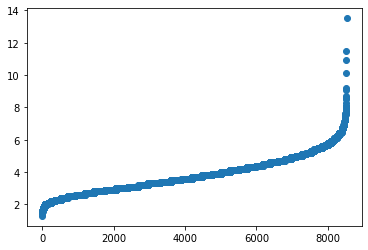

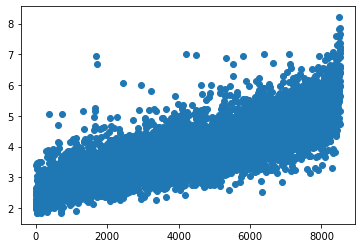

In [36]:
ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]])
plt.show()
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])

7. L190400
============

In [37]:
y=data[['AGE_y', 'SEX_y', 'L100700_y','L100800_y', 'L101300_y', 'L101600_y', 'L101700_y', 'L102900_y', 'L103000_y',
       'L103100_y', 'L103300_y', 'L104600_y',  'L190300_y', 'L190400_y', 'L190500_y','S000300_y','S000501_y','S000502_y',
        'CLASS_y']]

ylable=y[['L190400_y']]  
xtrain,xtest,ytrain,ytest=train_test_split(x, ylable, random_state=42, test_size=0.2)

In [38]:
regr = RandomForestRegressor(max_depth=12, random_state=0,verbose =1,
                             n_estimators=300)
regr.fit(xtrain, ytrain) 
print(regr.feature_importances_)
ypred=regr.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
ypredPD['t']=xtest['L190400_x'].values
ypredPD['t + 1']=ytest.values
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   53.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[5.63573948e-03 4.93575624e-01 6.74204556e-03 6.06819432e-03
 5.49545575e-03 6.68952424e-03 5.86332855e-03 7.21697587e-03
 6.87580464e-03 7.74817903e-03 4.41997668e-03 7.57486698e-03
 9.53128848e-03 3.99957792e-01 7.12920043e-03 7.81706403e-03
 5.47577107e-03 4.64591766e-03 2.18452909e-04 4.37756183e-04
 3.14462385e-04 5.66579842e-04]
mean_squared_error 0.5305060555843941
root mean_squared_error 0.7283584664053779
mean_absolute_error 0.5548470076029676
r2_score 0.7729536142737896


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


,t,t + 1,pred (t +1)
0,13.3,13.0,13.115785
1,11.1,12.1,10.844527
2,12.6,13.0,12.807126
3,14.4,14.8,14.606349
4,12.6,12.2,12.781882
5,13.6,12.3,14.118035
6,12.3,12.0,12.456250
7,15.2,15.2,15.243225
8,13.0,13.6,12.955673
9,12.1,12.4,12.312774


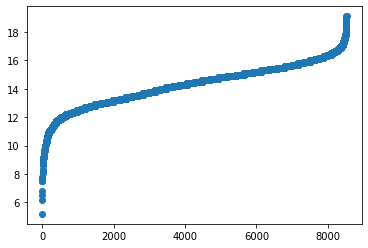

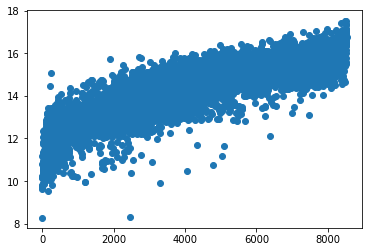

In [39]:
ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]])
plt.show()
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])

8. L100700
===========

In [40]:
y=data[['AGE_y', 'SEX_y', 'L100700_y','L100800_y', 'L101300_y', 'L101600_y', 'L101700_y', 'L102900_y', 'L103000_y',
       'L103100_y', 'L103300_y', 'L104600_y',  'L190300_y', 'L190400_y', 'L190500_y','S000300_y','S000501_y','S000502_y',
        'CLASS_y']]

ylable=y[['L100700_y']]  
xtrain,xtest,ytrain,ytest=train_test_split(x, ylable, random_state=42, test_size=0.2)

In [41]:
regr = RandomForestRegressor(max_depth=12, random_state=0,verbose =1,
                             n_estimators=300)
regr.fit(xtrain, ytrain) 
print(regr.feature_importances_)
ypred=regr.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
ypredPD['t']=xtest['L100700_x'].values
ypredPD['t + 1']=ytest.values
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   54.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[6.89384145e-03 1.92999273e-02 8.68309593e-01 9.00853484e-03
 5.98599879e-03 6.33770283e-03 6.03626470e-03 7.52618710e-03
 1.43479579e-02 6.29734213e-03 4.82288302e-03 7.16939954e-03
 6.53203051e-03 4.77535796e-03 5.83727602e-03 8.88187255e-03
 5.96886836e-03 4.24699769e-03 2.79371803e-04 3.95149045e-04
 3.41238746e-04 7.06204692e-04]
mean_squared_error 0.4918421880963492
root mean_squared_error 0.7013146142041738
mean_absolute_error 0.5365226138701358
r2_score 0.7546602889187406


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


,t,t + 1,pred (t +1)
0,4.7,4.2,4.750091
1,2.0,2.9,2.416335
2,4.9,6.7,4.980593
3,4.7,4.6,5.152799
4,4.7,4.7,4.653823
5,7.6,6.7,7.674688
6,4.5,4.3,4.587971
7,5.8,6.6,6.041854
8,4.1,4.6,4.174578
9,5.9,5.2,5.332376


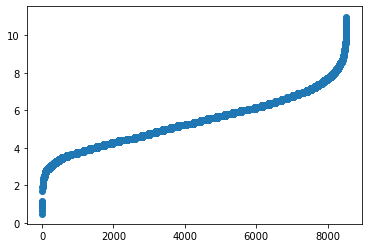

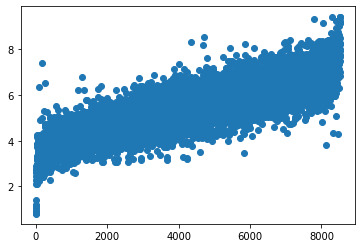

In [42]:
ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]])
plt.show()
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])

9. L190500
============

In [43]:
y=data[['AGE_y', 'SEX_y', 'L100700_y','L100800_y', 'L101300_y', 'L101600_y', 'L101700_y', 'L102900_y', 'L103000_y',
       'L103100_y', 'L103300_y', 'L104600_y',  'L190300_y', 'L190400_y', 'L190500_y','S000300_y','S000501_y','S000502_y',
        'CLASS_y']]

ylable=y[['L190500_y']]  
xtrain,xtest,ytrain,ytest=train_test_split(x, ylable, random_state=42, test_size=0.2)

In [44]:
regr = RandomForestRegressor(max_depth=12, random_state=0,verbose =1,
                             n_estimators=300)
regr.fit(xtrain, ytrain) 
print(regr.feature_importances_)
ypred=regr.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
ypredPD['t']=xtest['L190500_x'].values
ypredPD['t + 1']=ytest.values
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   53.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[5.94311266e-03 4.90544329e-01 7.52091312e-03 6.51369368e-03
 6.12878611e-03 7.38232138e-03 5.90111537e-03 8.08524559e-03
 7.29768297e-03 7.12132141e-03 4.70503089e-03 7.76362109e-03
 9.17109542e-03 2.62110812e-01 1.43246249e-01 8.49039540e-03
 5.72601130e-03 4.84792808e-03 2.38628192e-04 3.74280505e-04
 3.14134625e-04 5.73292866e-04]
mean_squared_error 4.4269086782429525
root mean_squared_error 2.1040220241820076
mean_absolute_error 1.6323385618789699
r2_score 0.7396169137015611


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


,t,t + 1,pred (t +1)
0,39.4,40.6,39.724531
1,34.4,36.8,34.018093
2,38.6,40.6,38.894679
3,42.7,44.1,43.565805
4,36.7,35.6,38.158658
5,40.8,37.4,42.446601
6,36.7,36.0,37.666757
7,44.1,45.0,44.774786
8,39.9,39.8,39.235935
9,35.4,37.1,36.880780


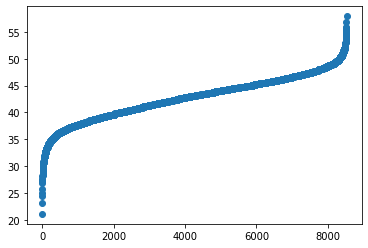

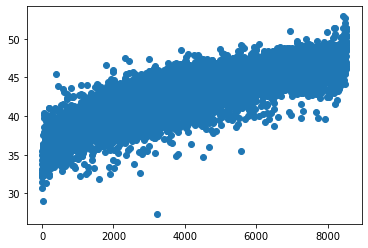

In [45]:
ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]])
plt.show()
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])

10. L101300
===============

In [58]:
x=data[['AGE_x', 'SEX_x', 'L100700_x','L100800_x', 'L101300_x', 'L101600_x', 'L101700_x', 'L102900_x', 'L103000_x',
       'L103100_x', 'L103300_x', 'L104600_x', 'L190300_x', 'L190400_x', 'L190500_x','S000300_x','S000501_x','S000502_x',
        'CLASS_x','sbpG','dbpG','AgeG']]

y=data[['AGE_y', 'SEX_y', 'L100700_y','L100800_y', 'L101300_y', 'L101600_y', 'L101700_y', 'L102900_y', 'L103000_y',
       'L103100_y', 'L103300_y', 'L104600_y',  'L190300_y', 'L190400_y', 'L190500_y','S000300_y','S000501_y','S000502_y',
        'CLASS_y']]

ylable=y[['L101300_y']]  
xtrain,xtest,ytrain,ytest=train_test_split(x, ylable, random_state=42, test_size=0.2)

In [59]:
regr = RandomForestRegressor(max_depth=12, random_state=0,verbose =1,
                             n_estimators=300)
regr.fit(xtrain, ytrain) 
print(regr.feature_importances_)
ypred=regr.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
ypredPD['t']=xtest['L101300_x'].values
ypredPD['t + 1']=ytest.values
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   54.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0.02796964 0.00720232 0.02687347 0.0271542  0.51297532 0.02591269
 0.03362596 0.02555122 0.05017972 0.02721999 0.02689253 0.03666994
 0.02259963 0.02248584 0.02560565 0.05087035 0.02044726 0.01732692
 0.00161881 0.00230197 0.0019235  0.00659307]
mean_squared_error 203.3634935807904
root mean_squared_error 14.260557267540086
mean_absolute_error 7.6642809280931985
r2_score 0.3134494442854766


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


,t,t + 1,pred (t +1)
0,13.0,16.0,14.006891
1,10.0,17.0,11.827084
2,13.0,16.0,16.001394
3,11.0,17.0,16.314954
4,10.0,11.0,13.104423
5,23.0,24.0,25.972473
6,19.0,14.0,22.321140
7,66.0,41.0,51.978331
8,11.0,9.0,13.784083
9,22.0,26.0,20.476503


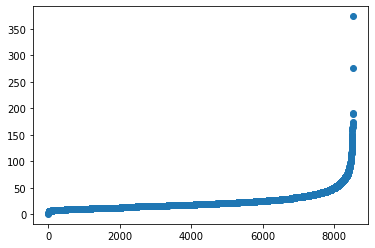

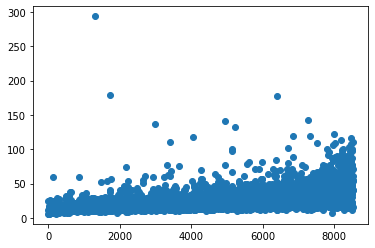

In [60]:
ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]])
plt.show()
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])

11. L190300
=============

In [61]:
y=data[['AGE_y', 'SEX_y', 'L100700_y','L100800_y', 'L101300_y', 'L101600_y', 'L101700_y', 'L102900_y', 'L103000_y',
       'L103100_y', 'L103300_y', 'L104600_y',  'L190300_y', 'L190400_y', 'L190500_y','S000300_y','S000501_y','S000502_y',
        'CLASS_y']]

ylable=y[['L190300_y']]  
xtrain,xtest,ytrain,ytest=train_test_split(x, ylable, random_state=42, test_size=0.2)

In [50]:
regr = RandomForestRegressor(max_depth=12, random_state=0,verbose =1,
                             n_estimators=300)
regr.fit(xtrain, ytrain) 
print(regr.feature_importances_)
ypred=regr.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
ypredPD['t']=xtest['L190300_x'].values
ypredPD['t + 1']=ytest.values
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   53.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[5.73558188e-03 2.58033540e-02 6.95171810e-03 6.37226409e-03
 5.47881793e-03 6.96165381e-03 5.35786579e-03 7.14631727e-03
 7.26520264e-03 7.56349886e-03 4.59201507e-03 6.38688470e-03
 8.64697008e-01 6.16850754e-03 1.35515040e-02 8.93387376e-03
 5.36321044e-03 4.25695380e-03 2.57817354e-04 2.94813562e-04
 2.74581905e-04 5.86555590e-04]
mean_squared_error 0.048298226939244744
root mean_squared_error 0.21976857586844564
mean_absolute_error 0.17179220000153772
r2_score 0.7537470600019948


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


,t,t + 1,pred (t +1)
0,4.59,4.42,4.464262
1,3.93,4.16,4.026421
2,4.22,4.38,4.248923
3,4.45,4.59,4.503423
4,3.88,3.77,3.979238
5,4.42,4.29,4.571162
6,4.14,3.91,4.240958
7,5.00,4.89,4.949077
8,4.20,4.19,4.158549
9,3.80,4.01,3.973996


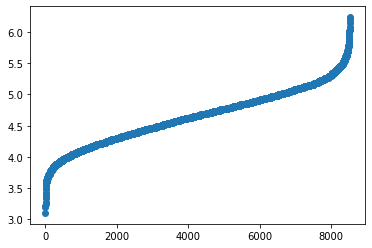

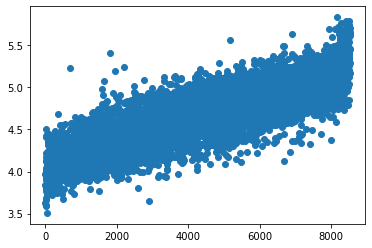

In [51]:
ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]])
plt.show()
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])

12. L103100
==========

In [52]:
y=data[['AGE_y', 'SEX_y', 'L100700_y','L100800_y', 'L101300_y', 'L101600_y', 'L101700_y', 'L102900_y', 'L103000_y',
       'L103100_y', 'L103300_y', 'L104600_y',  'L190300_y', 'L190400_y', 'L190500_y','S000300_y','S000501_y','S000502_y',
        'CLASS_y']]

ylable=y[['L103100_y']]  
xtrain,xtest,ytrain,ytest=train_test_split(x, ylable, random_state=42, test_size=0.2)

In [53]:
regr = RandomForestRegressor(max_depth=12, random_state=0,verbose =1,
                             n_estimators=300)
regr.fit(xtrain, ytrain) 
print(regr.feature_importances_)
ypred=regr.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
ypredPD['t']=xtest['L103100_x'].values
ypredPD['t + 1']=ytest.values
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   55.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[1.05256277e-02 9.93872214e-04 1.55206725e-02 1.12561774e-02
 9.94994503e-03 1.75705748e-02 1.19222030e-02 1.07949438e-02
 1.51538598e-02 8.05274687e-01 7.80393039e-03 1.49306270e-02
 1.53205944e-02 8.39546499e-03 1.05750776e-02 1.42184690e-02
 9.08045819e-03 8.26377142e-03 4.40880716e-04 5.39940217e-04
 4.55668460e-04 1.01255425e-03]
mean_squared_error 73.82838857873718
root mean_squared_error 8.592344766054094
mean_absolute_error 6.496606060771483
r2_score 0.6434069350545935


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


,t,t + 1,pred (t +1)
0,59.0,59.0,60.286472
1,53.0,51.0,57.092566
2,60.0,94.0,61.474478
3,45.0,43.0,48.140888
4,74.0,85.0,76.865268
5,39.0,35.0,41.716021
6,49.0,66.0,55.119286
7,48.0,58.0,48.308586
8,50.0,55.0,55.148754
9,55.0,55.0,55.726134


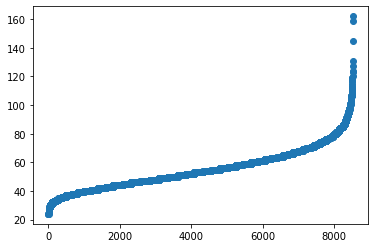

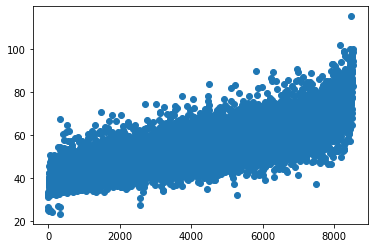

In [54]:
ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]])
plt.show()
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])